# Machine Learning Assignment - I

##  **1. Regression CO1,2 B4**

## For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

**imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

### **(a) Loading the Dataset and making appropriate X matrix and y vector**

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
X = df.drop('num', axis=1)
y = df['num']
X.shape
pd.set_option('future.no_silent_downcasting', True)

**Basic Preprocessing**

In [3]:
X.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

Handling the null values

In [4]:
X.dropna(axis=1, thresh=0.5 * len(X), inplace=True)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

Encoding the Categorical Values

In [5]:
# Identify categorical columns and apply one-hot encoding 
cat_cols = X.select_dtypes(include=['object', 'category']).columns

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X_encoded.copy()

In [6]:
X.head()

,id,age,trestbps,chol,thalch,oldpeak,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping
0,1,63,145.0,233.0,150.0,2.3,True,False,False,False,False,False,True,True,False,False,False,False,False
1,2,67,160.0,286.0,108.0,1.5,True,False,False,False,False,False,False,False,False,False,True,True,False
2,3,67,120.0,229.0,129.0,2.6,True,False,False,False,False,False,False,False,False,False,True,True,False
3,4,37,130.0,250.0,187.0,3.5,True,False,False,False,False,True,False,False,True,False,False,False,False
4,5,41,130.0,204.0,172.0,1.4,False,False,False,False,True,False,False,False,False,False,False,False,True


Scaling the values

In [7]:
standScale = StandardScaler()
X_scaled = standScale.fit_transform(X)
X = X_scaled.copy()


### **(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which willbe used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).**


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### **(c) Give the objective of logistic regression with L2 regularization.**

#### Logistic Regression with L2 Regularization

- Logistic regression is a **classification algorithm** that predicts the probability of a binary outcome \(y \in \{0,1\}\) given input features \(X\).
- It models the probability using the **sigmoid function**
- Logistic regression can **overfit** when there are:
  - Many features
  - Highly correlated features
  - Small datasets
- Overfitting leads to **large weights** that fit the training data well but **perform poorly on unseen data**.

- **L2 regularization** adds a **penalty term proportional to the square of the weight magnitudes**.
- 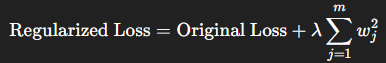
- λ = regularization parameter controlling penalty strength
- Combined formulae with the cross-entropy loss is:
- 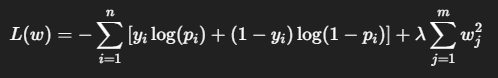
-  The model now **minimizes both the logistic loss and the magnitude of weights**.
- Helps in **reducing overfitting** and improving **generalization**.
- **Objective:** Minimize the regularized loss to **fit data while keeping weights small**, reducing overfitting.


---

### **(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.**

#### Regularization Parameter (λ)
   * The regularization strength is controlled using different values of **λ**:
   * As **λ increases**, the regularization becomes **stronger** — meaning the model penalizes large weights more heavily to avoid overfitting.

#### Logistic Regression and Regularization
   * Unlike **Linear Regression**, where regularization is applied using `Ridge` (L2) and `Lasso` (L1) from `sklearn.linear_model`, 
   * In **Logistic Regression**, regularization is controlled via the `penalty` parameter.
   * Use the `penalty` parameter in `LogisticRegression`:
   * `'l2'` → L2 Regularization (Ridge)
   * `'l1'` → L1 Regularization (Lasso)
   * The regularization strength is set using the **`C` parameter**, where **C = 1/λ**; that mean A smaller `C` means stronger regularization.


- Several arrays are initialized to collect results from each model:
- `train_losses`: Cross-entropy loss on the training data
- `test_losses`: Cross-entropy loss on the test data
- `train_accuracy`: Accuracy on training data
- `test_accuracy`: Accuracy on test data
- `l2_norms`: L2 norm of the model weight vector
- `weights`: Model coefficient vectors


 The **logistic loss** (also called **cross-entropy loss**) is used to measure how well the model predicts probabilities:

```python
from sklearn.metrics import log_loss
log_loss(y_true, y_pred_prob)

In [9]:
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
l2_norms, weights = [], []
train_accuracy, test_accuracy = [], []

for val in lambdas:
    C = 10**12 if val == 0 else 1 / val
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    l2_norms.append(np.linalg.norm(model.coef_))
    weights.append(model.coef_.flatten())

weights = np.array(weights)

#### 1. **Cross-Entropy Loss vs λ (Regularization Parameter)**

- **Training Loss** increases steadily as λ increases.
- **Test Loss** is lowest at λ ≈ 0.1 or 1, then rises sharply for larger λ.

**Interpretation**:
- Small λ values allow the model to capture patterns while avoiding overfitting.
- Large λ values over-penalize the model, leading to **underfitting**, which hurts both train and test performance.
- Reflects the classic **bias-variance trade-off** controlled by regularization strength.

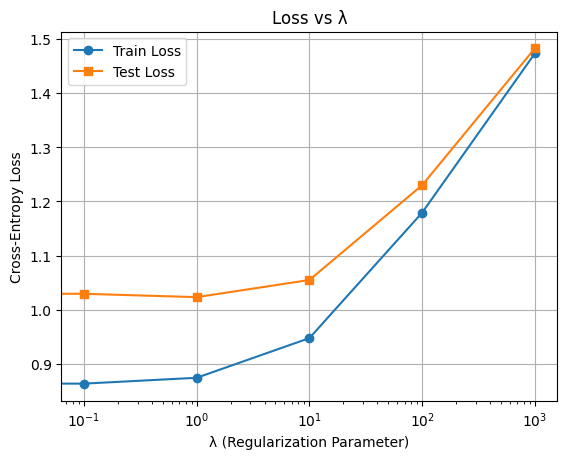

In [10]:
plt.figure()
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss vs λ')
plt.grid(True)
plt.legend()
plt.show()

#### 2. **L2 Norm vs λ (Regularization Parameter)**

- L2 norm of the weight vector **decreases** monotonically as λ increases.

**Interpretation**:
- Larger λ values impose stronger penalties on weight magnitudes.
- As a result, the model complexity is reduced by **shrinking weights toward zero**.
- Confirms the expected behavior of L2 regularization.

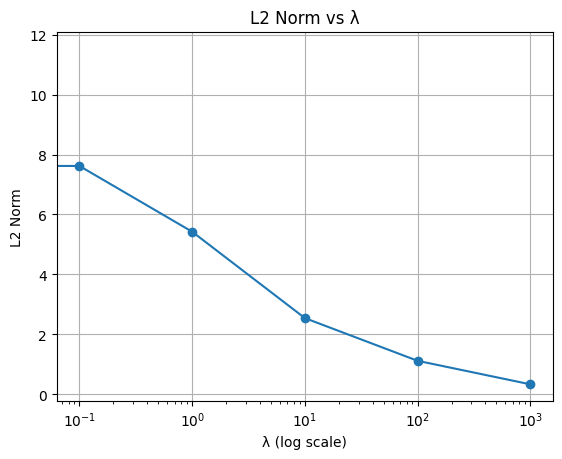

In [11]:
plt.figure()
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm')
plt.title('L2 Norm vs λ')
plt.grid(True)
plt.show()

### 3. **Weight Coefficients vs λ**

- At small λ, weights show **larger variance** and stronger influence.
- As λ increases, **all weight coefficients converge toward zero**.

**Interpretation**:
- For small λ, the model is more flexible and responsive to individual features.
- For large λ, the model is overly constrained and fails to capture meaningful patterns.
- Demonstrates **regularization’s role in smoothing and simplifying** the learned model.


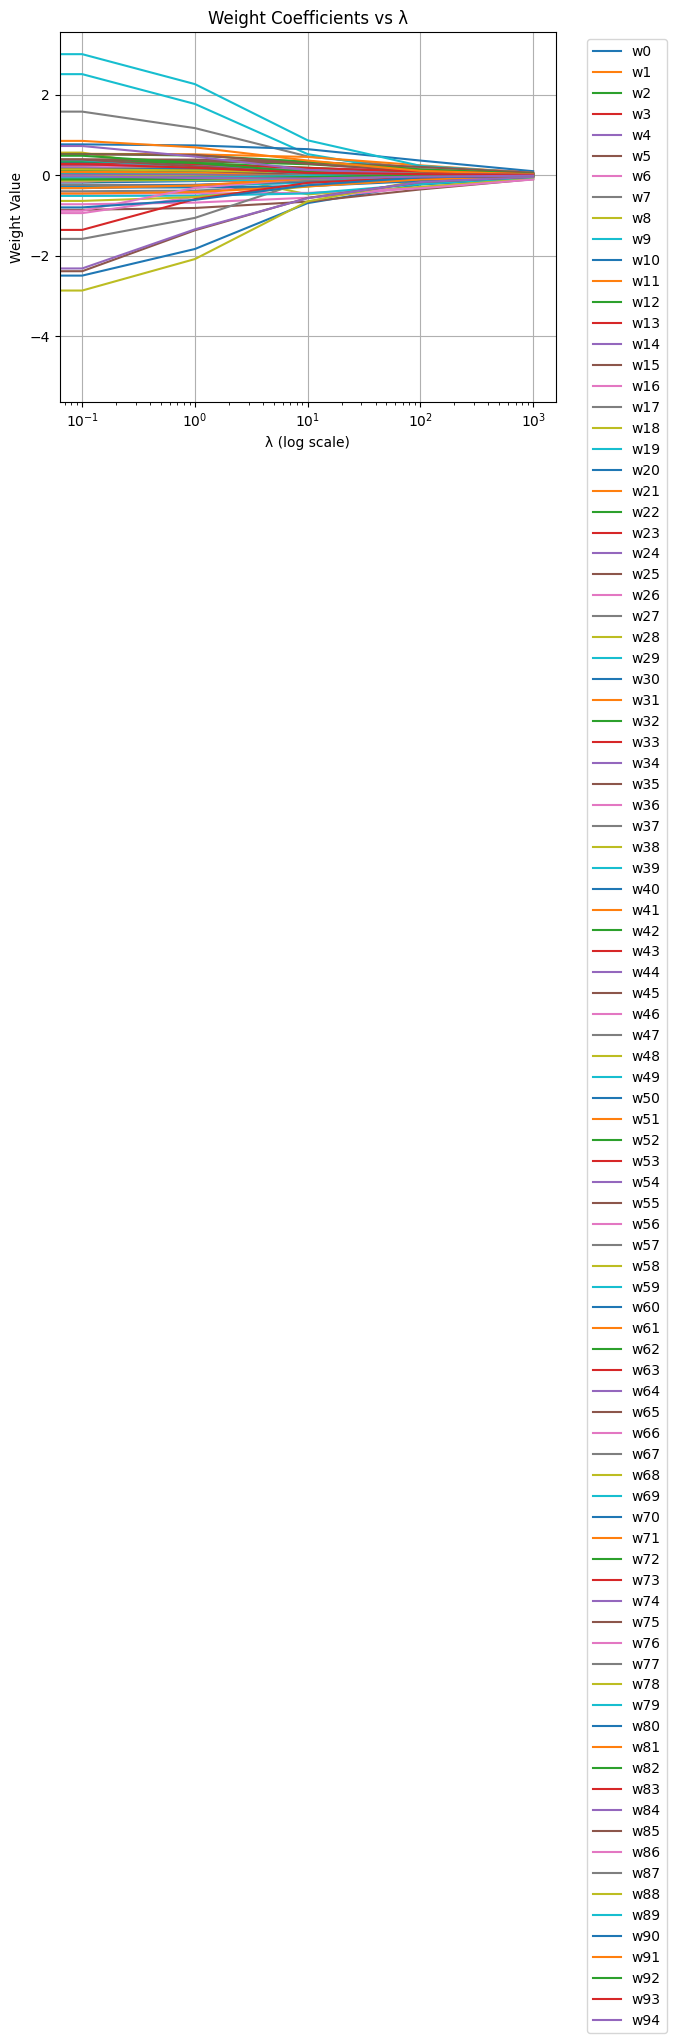

In [12]:
plt.figure()
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], label=f'w{i}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weight Coefficients vs λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 4. **Accuracy vs λ**

- **Training Accuracy** drops as λ increases.
- **Test Accuracy** remains stable or slightly improves for moderate λ.

**Interpretation**:
- Increased regularization reduces training performance (due to less overfitting).
- Test accuracy benefits slightly from regularization, especially around λ ≈ 10–100.
- Indicates improved **generalization** due to regularization.

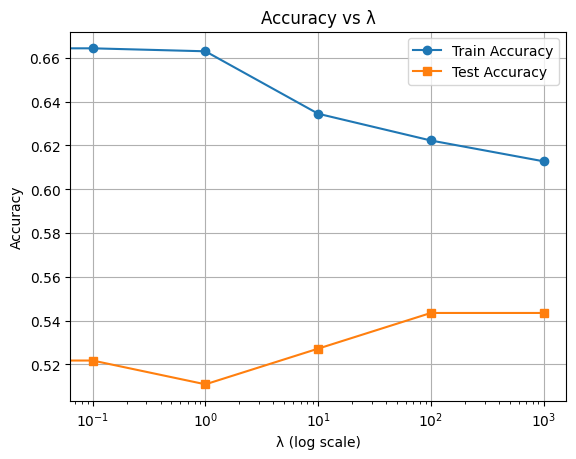

In [13]:
plt.figure()
plt.plot(lambdas, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accuracy, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.grid(True)
plt.legend()
plt.show()


----

### **(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

#### Gaussian Basis Function

* For a single feature value 𝑥, the output of a Gaussian basis function with **mean 𝜇** and **variance σ2** is:

 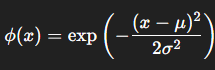
* **𝑥** is your input feature value.
* **𝜇** is the mean of the Gaussian (i.e., where the curve is centered).
* **𝜎** is the standard deviation, controlling the width of the curve.
 

#### You applied 5 Gaussian basis functions per feature:
* The means 𝜇 were evenly spaced between -10 and 10:

e.g., `[-10, -5, 0, 5, 10]`

*You experimented with 5 different values of σ:

σ = `0.1, 0.5, 1, 5, 10`

**Functions to apply the Gaussian basis Function**

In [14]:
import numpy as np

def generate_gaussian_basis(X, means, sigma):
    """
    Apply Gaussian basis functions to each feature in X.
    
    Parameters:
    - X: ndarray of shape (n_samples, n_features)
    - means: list or array of means for the Gaussian basis functions
    - sigma: standard deviation (not variance)

    Returns:
    - Transformed feature matrix with Gaussian basis expansion
    """
    n_samples, n_features = X.shape
    transformed_features = []

    for feature_idx in range(n_features):
        feature_column = X[:, feature_idx].reshape(-1, 1)
        # Apply 1D Gaussian basis functions for each mean
        basis_outputs = [
            np.exp(- (feature_column - mu)**2 / (2 * sigma**2))
            for mu in means
        ]
        transformed_features.append(np.hstack(basis_outputs))

    # Concatenate all transformed features
    return np.hstack(transformed_features)


In [15]:
# Define 5 means between -10 and 10
means = np.linspace(-10, 10, 5)

# Try with different sigma values
sigma_values = [0.1, 0.5, 1, 5, 10]

# Dictionary to store transformed data for each sigma
gaussian_transformed_data = {}

for sigma in sigma_values:
    X_train_transformed = generate_gaussian_basis(X_train, means, sigma)
    X_test_transformed = generate_gaussian_basis(X_test, means, sigma)
    
    gaussian_transformed_data[sigma] = {
        'X_train': X_train_transformed,
        'X_test': X_test_transformed
    }
    print(f"[INFO] Transformed X_train shape for σ={sigma}: {X_train_transformed.shape}")


[INFO] Transformed X_train shape for σ=0.1: (736, 95)
[INFO] Transformed X_train shape for σ=0.5: (736, 95)
[INFO] Transformed X_train shape for σ=1: (736, 95)
[INFO] Transformed X_train shape for σ=5: (736, 95)
[INFO] Transformed X_train shape for σ=10: (736, 95)


#### After applying 5 Gaussian functions per feature:

 * Each feature → transformed into 5 new features

 * Total features: **19 × 5 = 95**

 * So, your transformed datasets have:

   `X_train.shape = (736, 95)`
 
   `X_test.shape = (32, 95)` `# assuming same test size ratio`


 * Each row is now a high-dimensional representation of the original input — where each feature is represented by how "close" it is to the various Gaussian means.

----

### **(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.**

##### The below function evaluates the impact of Gaussian basis function transformations on logistic regression performance.


1. **Baseline Model (No Transformation)**  
   - Train logistic regression on original features.  
   - Record training and testing errors as reference.

2. **Feature Transformation**  
   - Apply 5 Gaussian basis functions per input feature.  
   - Vary σ (standard deviation) to control the width of each Gaussian.  
   - Transformed features increase dimensionality and introduce non-linearity.

3. **Model Training**  
   - For each σ ∈ {0.1, 0.5, 1, 5, 10}:  
     - Train logistic regression on transformed data (no regularization).  
     - Measure training and testing errors.

4. **Error Comparison**  
   - Plot errors across σ values and compare with the baseline.  
   - Analyze regions of underfitting, overfitting, and best generalization.


- Determines whether Gaussian transformations improve non-linear pattern capture.  
- Highlights how σ influences the **bias-variance trade-off**.  
- Identifies optimal σ for generalization performance.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Baseline model on original data (before basis expansion)
baseline_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=50000)
baseline_model.fit(X_train, y_train)

baseline_train_acc = accuracy_score(y_train, baseline_model.predict(X_train))
baseline_test_acc = accuracy_score(y_test, baseline_model.predict(X_test))

baseline_train_err = 1 - baseline_train_acc
baseline_test_err = 1 - baseline_test_acc

print(f"[Baseline] Train Error: {baseline_train_err:.4f}, Test Error: {baseline_test_err:.4f}")

# Store errors for plotting
sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

for sigma in sigma_values:
    X_train_sigma = gaussian_transformed_data[sigma]['X_train']
    X_test_sigma = gaussian_transformed_data[sigma]['X_test']

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=50000)
    model.fit(X_train_sigma, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train_sigma))
    test_acc = accuracy_score(y_test, model.predict(X_test_sigma))

    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

    print(f"[σ={sigma}] Train Error: {1 - train_acc:.4f}, Test Error: {1 - test_acc:.4f}")


[Baseline] Train Error: 0.3274, Test Error: 0.4565
[σ=0.1] Train Error: 0.4946, Test Error: 0.5489
[σ=0.5] Train Error: 0.3750, Test Error: 0.4239


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[σ=1] Train Error: 0.3451, Test Error: 0.4565


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[σ=5] Train Error: 0.2976, Test Error: 0.4293
[σ=10] Train Error: 0.3111, Test Error: 0.4565


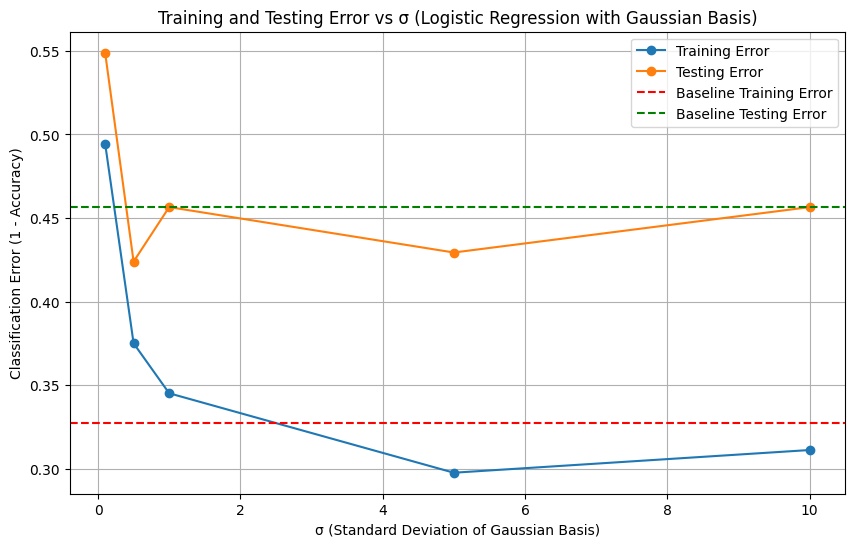

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Training Error')
plt.plot(sigma_values, test_errors, marker='o', label='Testing Error')

# Add baseline error lines
plt.axhline(y=baseline_train_err, color='red', linestyle='--', label='Baseline Training Error')
plt.axhline(y=baseline_test_err, color='green', linestyle='--', label='Baseline Testing Error')

plt.title('Training and Testing Error vs σ (Logistic Regression with Gaussian Basis)')
plt.xlabel('σ (Standard Deviation of Gaussian Basis)')
plt.ylabel('Classification Error (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()


## Observations & Analysis

---

### σ = 0.1

- **Training Error**: High  
- **Testing Error**: Very High  
- **Underfitting** – The basis functions are too narrow, acting like nearly zero unless exactly centered. The model struggles to learn.

---

### σ = 0.5

- **Training Error**: Drops sharply  
- **Testing Error**: **Lowest**  
-  **Sweet spot** — good expressive power without overfitting  
-  Gaussian bumps are narrow enough to capture structure, but not too localized

---

### σ = 1

- **Testing Error**: Slightly worse than σ = 0.5, but still better than baseline  
- **Still a good bias-variance trade-off**

---

### σ = 5, 10

- **Training Error**: Low  
- **Testing Error**: Almost equal to baseline  
-  Model learns patterns (**training error ↓**)  
-  But those patterns **don’t generalize well** (**testing error doesn’t improve**)  
- **Underfitting due to over-smoothing**:  
  - Basis functions are too wide  
  - Features become too similar  
  - Loss of discriminative power

---

### Compared to Baseline

-  You achieved **lower training and testing error** than baseline for σ in **[0.5, 1, 5]**
-  For **σ = 0.5**, testing error is the **lowest of all**, meaning the basis expansion **helped generalization**


### **(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

#### Evaluating the effect of **L2 regularization** on a logistic regression model using **Gaussian basis functions** with different width parameters (σ). The key objectives are:

* To study how the regularization parameter **λ (lambda)** affects model performance and weight magnitudes.

* To visualize the impact of **regularization strength** on:

    - Cross-entropy loss for both training and testing data.

    - L2 norm of the entire weight vector.

    - L2 norms corresponding to each σ group of basis functions.

* We used the LogisticRegression model from scikit-learn with the **saga** solver, and trained models for multiple λ values:

  
`λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}`

* All the Gaussian basis function blocks were concatenated into a single feature vector, and models were trained on this full transformed feature set.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define lambda values and sigma values
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]
sigma_values = list(gaussian_transformed_data.keys())

# Combine all sigma-transformed data for X_train and X_test
X_train_all = np.hstack([gaussian_transformed_data[sigma]['X_train'] for sigma in sigma_values])
X_test_all = np.hstack([gaussian_transformed_data[sigma]['X_test'] for sigma in sigma_values])

train_errors = []
test_errors = []
l2_norms_total = []
l2_norms_per_sigma = {sigma: [] for sigma in sigma_values}

# Track number of features per sigma block to slice weights later
feature_blocks = [gaussian_transformed_data[sigma]['X_train'].shape[1] for sigma in sigma_values]

for lam in lambda_values:
    C_val = 10**12 if lam == 0 else 1 / lam  # To simulate no regularization when lambda=0

    clf = LogisticRegression(penalty='l2', C=C_val, solver='saga', max_iter=100000, random_state=42, n_jobs=-1)
    clf.fit(X_train_all, y_train)

    # Predict probabilities
    y_train_prob = clf.predict_proba(X_train_all)
    y_test_prob = clf.predict_proba(X_test_all)

    # Compute cross-entropy loss
    train_ce = log_loss(y_train, y_train_prob)
    test_ce = log_loss(y_test, y_test_prob)

    train_errors.append(train_ce)
    test_errors.append(test_ce)

    # Compute L2 norm of entire weight vector
    l2_norm_total = np.linalg.norm(clf.coef_)
    l2_norms_total.append(l2_norm_total)

    # Compute L2 norm per sigma block
    weights = clf.coef_.flatten()
    start = 0
    for i, sigma in enumerate(sigma_values):
        end = start + feature_blocks[i]
        block_weights = weights[start:end]
        block_l2_norm = np.linalg.norm(block_weights)
        l2_norms_per_sigma[sigma].append(block_l2_norm)
        start = end

#### **Cross-Entropy Loss vs λ (log scale)**

- This graph shows how the a**verage cross-entropy loss varies for both training and testing data** as a function of the regularization strength λ (on a logarithmic scale).

- For **small λ (weak regularization), the training error is low** but the **test error is relatively high**, indicating overfitting.

- As **λ increases, both training and testing errors increase**, with testing error increasing less steeply at first, suggesting better generalization initially.

- However, at **very large λ values, the model underfits**, leading to higher errors on both training and testing data.

- Optimal **performance likely lies near small λ values** `(0.1 to 1)`, where generalization is balanced.

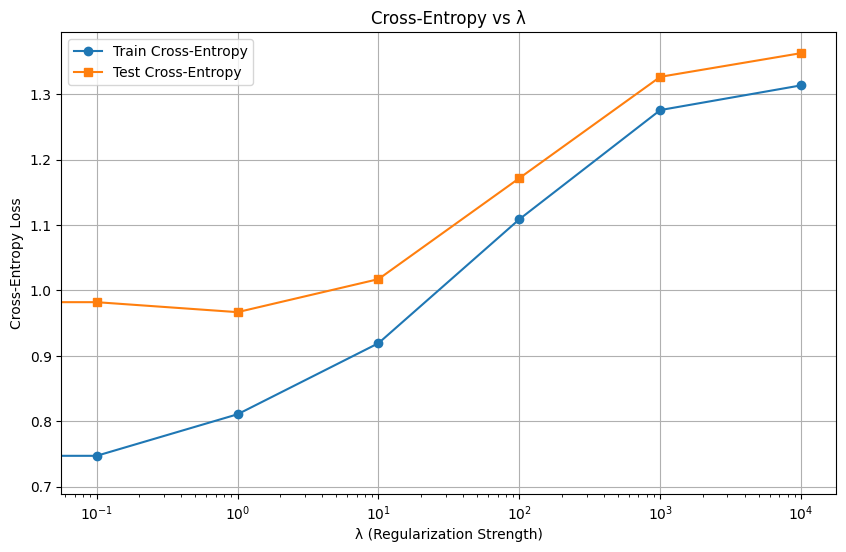

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_errors, marker='o', label="Train Cross-Entropy")
plt.plot(lambda_values, test_errors, marker='s', label="Test Cross-Entropy")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.grid(True)
plt.show()

#### **L2 Norm of Weights for Each vs λ (Regularization Strength)**

This plot shows the **L2 norm of the entire weight vector** as λ increases.

   - As expected, increasing regularization strength **shrinks the weight magnitudes** to prevent overfitting.
    
   - The norm decreases sharply as λ increases from `0.1` to `1000`, and flattens for larger values.
    
   - This confirms that **L2 regularization effectively penalizes large weights**, l**eading to simpler models**.

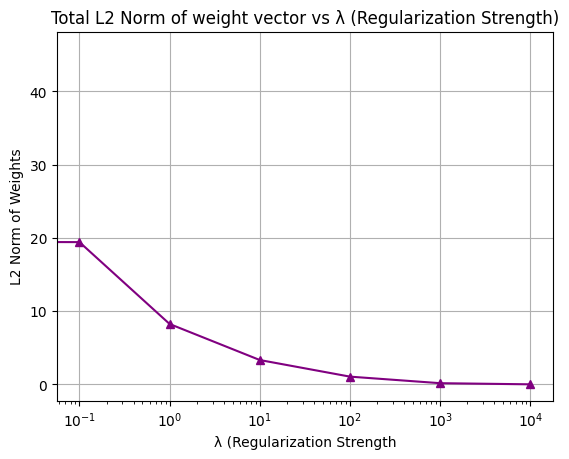

In [20]:
plt.figure()
plt.plot(lambda_values, l2_norms_total, marker="^", color = 'purple')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength")
plt.ylabel("L2 Norm of Weights")
plt.title("Total L2 Norm of weight vector vs λ (Regularization Strength)")
plt.grid(True)
plt.show()

#### **L2 Norm of Weights for Each σ vs λ**

This plot shows how the **L2 norm of weights for each group of** **Gaussian basis functions (σ)** varies with λ.

   - At small λ (weak regularization), weights from different σ values have varying magnitudes — particularly `σ = 5` and `σ = 1` dominate, suggesting they are more influential.
    
   -  As λ increases, the L2 norm of all groups reduces gradually, converging to near-zero values at high regularization.
    
   - This indicates that **larger λ values uniformly shrink all basis function contributions, while small λ allows selective feature dominance.**
    
   - The curves reveal which **scales of Gaussian basis functions are most relevant** to the classification task.

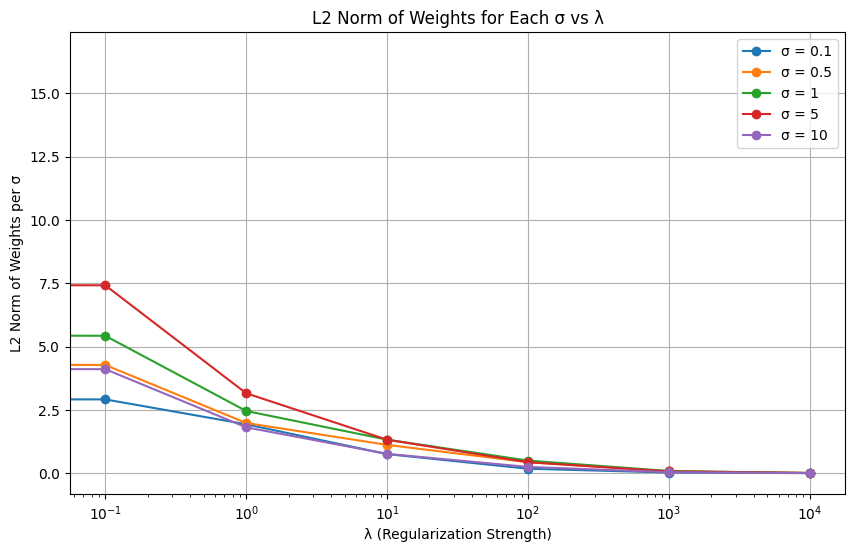

In [21]:
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(lambda_values, l2_norms_per_sigma[sigma], marker='o', label=f"σ = {sigma}")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("L2 Norm of Weights per σ")
plt.title("L2 Norm of Weights for Each σ vs λ")
plt.legend()
plt.grid(True)
plt.show()

### **(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).**

#### To design Gaussian basis functions that **capture relationships between inputs**, you would move beyond applying Gaussians to individual features and instead design functions that consider **combinations of features**. For example, instead of just using Gaussians centered on single variables like `𝑥1 or 𝑥2`, you could create basis functions that depend on both `x1 and 𝑥2` together — this helps the model learn interactions between features.

#### This approach makes the model more expressive, allowing it to capture more complex and realistic patterns in the data — especially when the target variable depends on how multiple features work together.

#### **Impact on the Bias-Variance Trade-off:**
   * **Bias Decreases -**


     The model can fit the data more accurately because it has the flexibility to capture complex patterns. This reduces underfitting.

   * **Variance Increases -**


        However, with increased flexibility comes the risk of the model fitting noise in the training data, leading to overfitting and poor generalization on unseen data.

   * **Regularization Becomes Important -**


        To handle this trade-off, techniques like L2 regularization are needed to control model complexity and avoid overfitting.


     